# Light CT Guide

## Import modules

Under normal running conditions you simply need to call:

In [1]:
import lightct

For the purposes of this guide, I'm going to import a few additional modules to allow for timing and vizulisation...

In [2]:
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Acquire projections (or reload projections)

You then need to define the project folder and the number of projections. The number of projections must be sufficient to cover a 360 degree range. The project folder does not need to exist and will be created on the fly. Running the TomoScan command will start the camera and acquire the projections (storing them in the defined folder):

In [ ]:
scan_folder = os.path.expanduser('~\Documents\lego_dog') # Equivalent to 'C:/Users/username/Documents/test/'
data = lightct.TomoScan(num_proj=200, folder=scan_folder)

In this case, I am going to reload projections from a previous experiment - the following process is nevertheless the same:

In [3]:
folder = os.path.expanduser('~\Dropbox\Python\lightct\lightct\example_scan\projections')
data= lightct.LoadProjections(folder)

Progress: [####################] 100%

## Find number of projections in 360$^\circ%$

The next step is to find the number of projections in 360$^\circ$ - there are three methods by which to do this. The most convenient is the automatic method, which requires you to specify an estimated number of projections in 360$^\circ$. 

This method looks at the deviation between the first image and each subsequent image. A defined minima should be found at the image closest to 360$^\circ$ and each multiple of 360$^\circ$ if multiple rotations were acquired. A smaller minima may well be observed at 180$^\circ$. If an incorrect number of projections is chosen then you can just rerun the calculation with a better estimate.

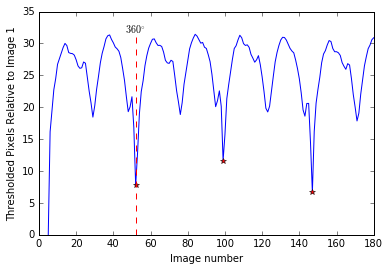


48 images in a 360 rotation. 

 If this is incorrect either rerun with a different value for est_nproj or use the manual method.


In [4]:
est_nproj = 54
data.auto_set_angles(est_nproj) # Gives wrong value

There is also a manual method, which is interactive and a simple set_angles method for instances in which the number of projections is known. The set_angles method also allows a range of 180$^\circ$ to be specified (although this is not recommended):

In [5]:
data.set_angles(48, 360)

## Find (or set) correct centre of rotation

To automatically find the correct centre of rotation, the auto_centre method can be used. This method works by flipping the image closest to 180$^\circ$ and then searching for the position at which the deviation between image_0 and image_180 (flipped) is closest to zero. By default the search window is 400 pixels (+/- 200) although any value can be specified.

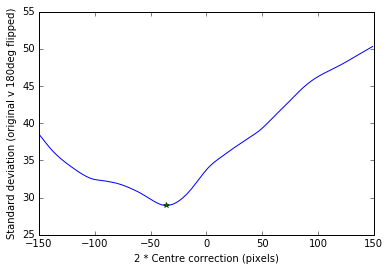

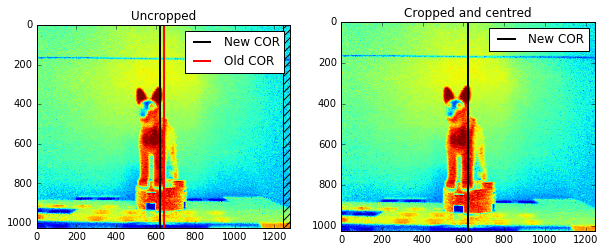

In [9]:
data.auto_centre(window=300)

Once again there is simple method for setting the correct value for instances in which the centre is known:

In [8]:
data.set_centre(-40)

## Reconstructing data

### Uncropped - downsample = (4, 4):

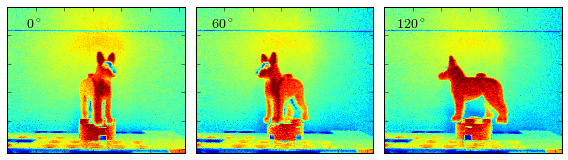

In [63]:
data.set_crop(width=0, top=0, bottom=0)

In [64]:
t0 = time.time()
data.reconstruct(downsample=(4,4))
t1 = time.time()

print('\nReconstruction time: %0ds' % (t1 - t0))


Reconstructing...
Progress: [####################] 100%
Reconstruction time: 28s


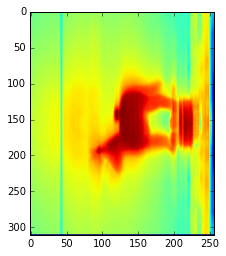

In [69]:
# Slice through the data
plt.imshow(data.recon_data[:, 150, :])

### Cropped - downsample = (4, 4):

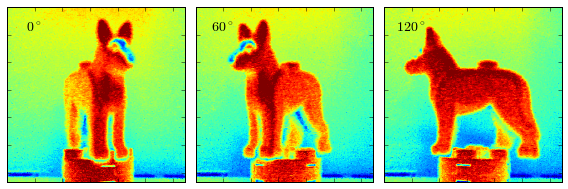

In [98]:
data.set_crop(width=300, top=270, bottom=120)

In [99]:
t0 = time.time()
data.reconstruct(downsample=(4,4))
t1 = time.time()

print('\nReconstruction time: %0ds' % (t1 - t0))


Reconstructing...
Progress: [####################] 100%
Reconstruction time: 5s


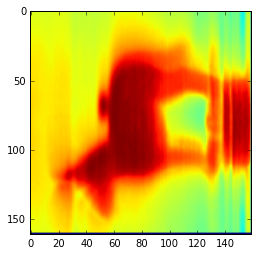

In [101]:
plt.imshow(data.recon_data[:, 72, :])

### Cropped - downsample = (2, 2):

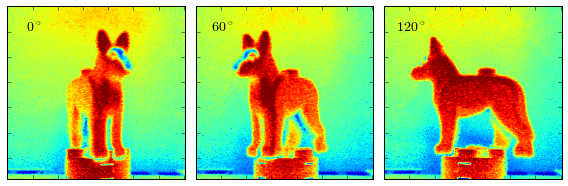

In [81]:
data.set_crop(width=300, top=270, bottom=120)

In [102]:
t0 = time.time()
data.reconstruct(downsample=(2,2))
t1 = time.time()

print('\nReconstruction time: %0ds' % (t1 - t0))


Reconstructing...
Progress: [####################] 100%
Reconstruction time: 35s


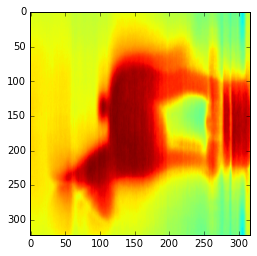

In [103]:
plt.imshow(data.recon_data[:, 144, :])